In [1]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
# Read the image
image = cv2.imread("/home/aolivepe/Computer-Vision/HW9/HW9_images/books_2.jpg")

# Resize the image
resized_image = cv2.resize(image, (480, 640))  # (width, height)

# Save the resized image
cv2.imwrite("/home/aolivepe/Computer-Vision/HW9/HW9_images/books_2_down.jpg", resized_image)


True

[[236 399]
 [438 404]
 [240 227]
 [381 228]
 [323 253]
 [233 432]
 [422 443]
 [325 322]]
[[107 405]
 [313 397]
 [138 232]
 [284 229]
 [219 256]
 [114 439]
 [310 437]
 [209 322]]


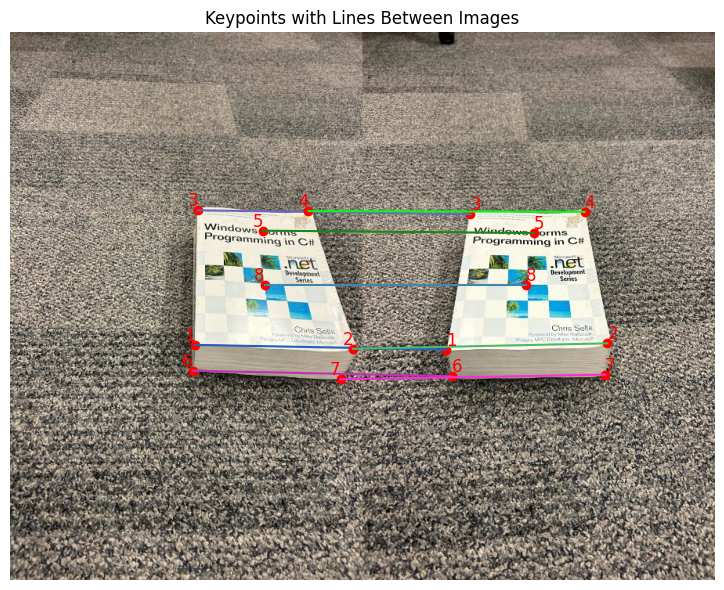

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your images
my_img1 = cv2.imread("/home/aolivepe/Computer-Vision/HW9/HW9_images/resized_img1.jpg")
my_img1 = cv2.cvtColor(my_img1, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib
# my_img1_kp = [(504, 729), (511, 410), (821, 415), (942, 737), (498, 789), (903, 811), (683, 457), (692, 589)]
my_img1_kp = np.load("/home/aolivepe/Computer-Vision/HW9/Pixel_Pts_Alex_1.npy")
print(my_img1_kp)
my_img2 = cv2.imread("/home/aolivepe/Computer-Vision/HW9/HW9_images/resized_img2.jpg")
my_img2 = cv2.cvtColor(my_img2, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib
# my_img2_kp = [(230, 747), (291, 422), (603, 411), (675, 727), (243, 810), (657, 803), (463, 459), (450, 590)]
my_img2_kp = np.load("/home/aolivepe/Computer-Vision/HW9/Pixel_Pts_Alex_2.npy")
print(my_img2_kp)


# Concatenate images side by side
height = max(my_img1.shape[0], my_img2.shape[0])
width = my_img1.shape[1] + my_img2.shape[1]
combined_image = np.zeros((height, width, 3), dtype=np.uint8)
combined_image[:my_img1.shape[0], :my_img1.shape[1]] = my_img1
combined_image[:my_img2.shape[0], my_img1.shape[1]:] = my_img2

# Adjust keypoints of the second image to match the combined coordinates
adjusted_img2_kp = [(x + my_img1.shape[1], y) for (x, y) in my_img2_kp]

# Plot the combined image
plt.figure(figsize=(12, 6))
plt.imshow(combined_image)
plt.title("Keypoints with Lines Between Images")

# Plot keypoints and lines
for i, ((x1, y1), (x2, y2)) in enumerate(zip(my_img1_kp, adjusted_img2_kp), start=1):
    # Plot keypoints
    plt.plot(x1, y1, 'ro')  # Keypoint in image 1
    plt.plot(x2, y2, 'ro')  # Keypoint in image 2
    # Plot line connecting the keypoints
    # Generate a random color
    random_color = np.random.rand(3)  # Generates 3 random values between 0 and 1 for RGB

    # Plot the line with the random color
    plt.plot([x1, x2], [y1, y2], color=random_color)
    # Add labels
    plt.text(x1, y1, str(i), color='red', fontsize=12, ha='right', va='bottom')
    plt.text(x2, y2, str(i), color='red', fontsize=12, ha='left', va='bottom')

plt.axis('off')
plt.tight_layout()
plt.show()
